In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=48ac07dc14cc289255cd0afa1a8f1fe614b2202eb236a76d74f14433b049470d
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
!pip install diptest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 kB 10.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import wget
import glob
import os
import json
from diptest import diptest

Downloading 27 Tissues with Gtex V8


In [ ]:
urls = [
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_adipose_subcutaneous.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_adrenal_gland.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_artery_tibial.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_brain_cerebellum.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_breast_mammary_tissue.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_colon_transverse.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_esophagus_mucosa.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_heart_left_ventricle.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_kidney_cortex.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_liver.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_lung.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_minor_salivary_gland.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_muscle_skeletal.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_nerve_tibial.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_ovary.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_pancreas.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_pituitary.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_prostate.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_skin_sun_exposed_lower_leg.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_small_intestine_terminal_ileum.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_spleen.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_stomach.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_testis.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_thyroid.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_uterus.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_vagina.gct.gz',
    'https://storage.googleapis.com/adult-gtex/bulk-gex/v8/rna-seq/tpms-by-tissue/gene_tpm_2017-06-05_v8_whole_blood.gct.gz'
]

In [ ]:
for l in urls:
  wget.download(l) #downloading the tissues

Analyse one file


In [ ]:
!zcat 'gene_tpm_2017-06-05_v8_brain_cerebellum.gct.gz' | head #first 10 rows of the selected file,we need skip two rows


#1.3
56200	243	0	0
id	Name	Description	GTEX-111FC-3326-SM-5GZYV	GTEX-1128S-2826-SM-5N9DI	GTEX-117XS-3126-SM-5GIDP	GTEX-1192X-3226-SM-5987D	GTEX-11DXW-1026-SM-5H11K	GTEX-11DXY-3126-SM-5N9BT	GTEX-11DYG-2926-SM-5H132	GTEX-11DZ1-2926-SM-5A5KI	GTEX-11EI6-2926-SM-5985U	GTEX-11EMC-3326-SM-5P9JH	GTEX-11GSO-3026-SM-5Q5AL	GTEX-11GSP-3126-SM-5A5LL	GTEX-11NUK-3026-SM-5986K	GTEX-11NV4-2226-SM-5BC4T	GTEX-11O72-2826-SM-5HL6W	GTEX-11OC5-0626-SM-5HL6M	GTEX-11ONC-3026-SM-5985W	GTEX-11PRG-2826-SM-5BC54	GTEX-11TTK-2826-SM-5GU5K	GTEX-11ZTS-3226-SM-5EGID	GTEX-11ZUS-2826-SM-5EQKW	GTEX-11ZVC-3026-SM-59HJM	GTEX-12126-0926-SM-5FQTW	GTEX-1269C-3126-SM-5EGI6	GTEX-12WSC-2926-SM-5BC5Z	GTEX-12WSD-3026-SM-5LZU7	GTEX-12WSE-2926-SM-5RQJ9	GTEX-12WSH-3126-SM-5LZW8	GTEX-12WSM-2126-SM-5GCOC	GTEX-12ZZX-2826-SM-5BC6K	GTEX-12ZZY-2926-SM-5DUXO	GTEX-12ZZZ-3126-SM-5LZU6	GTEX-13112-2926-SM-5DUWT	GTEX-1313W-3026-SM-5LZUZ	GTEX-131XH-2926-SM-5LZU4	GTEX-131YS-3026-SM-5EGHY	GTEX-132Q8-2926-SM-5IFFP	GTEX-1399T-3126-SM-5IJFS	GTEX-139TS-

In [ ]:
df_brain = pd.read_csv('gene_tpm_2017-06-05_v8_brain_cerebellum.gct.gz', sep="\t", compression="gzip", skiprows=2)


In [ ]:
df_brain['idx']=df_brain['Name'] + "#" + df_brain['Description']

In [ ]:
df_brain.set_index('idx', inplace=True)

In [ ]:
df_brain.head()

,id,Name,Description,GTEX-111FC-3326-SM-5GZYV,GTEX-1128S-2826-SM-5N9DI,GTEX-117XS-3126-SM-5GIDP,GTEX-1192X-3226-SM-5987D,GTEX-11DXW-1026-SM-5H11K,GTEX-11DXY-3126-SM-5N9BT,GTEX-11DYG-2926-SM-5H132,...,GTEX-ZAB4-2926-SM-57WCV,GTEX-ZAJG-3026-SM-5HL92,GTEX-ZAK1-2926-SM-5HL9S,GTEX-ZDXO-2926-SM-4WKFM,GTEX-ZF28-2926-SM-4WKG1,GTEX-ZUA1-2926-SM-59HL3,GTEX-ZVT3-2926-SM-5GU6M,GTEX-ZYFD-2926-SM-5GID9,GTEX-ZYY3-3026-SM-5GIEJ,GTEX-ZZPT-2926-SM-5EQ5S
idx,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5#DDX11L1,0,ENSG00000223972.5,DDX11L1,0.000,0.000,0.0369,0.0323,0.0000,0.0000,0.0297,...,0.0000,0.0332,0.000,0.0316,0.0000,0.000,0.000,0.0000,0.0261,0.0313
ENSG00000227232.5#WASH7P,1,ENSG00000227232.5,WASH7P,7.778,8.939,8.2190,6.3470,5.3930,7.3230,9.1290,...,6.6190,6.8710,4.162,7.6590,6.5580,3.032,7.012,5.7910,5.5110,3.9070
ENSG00000278267.1#MIR6859-1,2,ENSG00000278267.1,MIR6859-1,0.771,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000
ENSG00000243485.5#MIR1302-2HG,3,ENSG00000243485.5,MIR1302-2HG,0.000,0.000,0.0000,0.1289,0.0667,0.0515,0.0000,...,0.0495,0.0000,0.000,0.0000,0.0708,0.000,0.000,0.0746,0.1043,0.0000
ENSG00000237613.2#FAM138A,4,ENSG00000237613.2,FAM138A,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0421,...,0.0703,0.0000,0.000,0.0449,0.0000,0.000,0.000,0.0000,0.0000,0.0000


In [ ]:
df_brain.drop(columns=['Name', 'id', 'Description'], inplace=True) #dropping irrelavnt columns

In [ ]:
df_brain.head()


,GTEX-111FC-3326-SM-5GZYV,GTEX-1128S-2826-SM-5N9DI,GTEX-117XS-3126-SM-5GIDP,GTEX-1192X-3226-SM-5987D,GTEX-11DXW-1026-SM-5H11K,GTEX-11DXY-3126-SM-5N9BT,GTEX-11DYG-2926-SM-5H132,GTEX-11DZ1-2926-SM-5A5KI,GTEX-11EI6-2926-SM-5985U,GTEX-11EMC-3326-SM-5P9JH,...,GTEX-ZAB4-2926-SM-57WCV,GTEX-ZAJG-3026-SM-5HL92,GTEX-ZAK1-2926-SM-5HL9S,GTEX-ZDXO-2926-SM-4WKFM,GTEX-ZF28-2926-SM-4WKG1,GTEX-ZUA1-2926-SM-59HL3,GTEX-ZVT3-2926-SM-5GU6M,GTEX-ZYFD-2926-SM-5GID9,GTEX-ZYY3-3026-SM-5GIEJ,GTEX-ZZPT-2926-SM-5EQ5S
idx,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5#DDX11L1,0.000,0.000,0.0369,0.0323,0.0000,0.0000,0.0297,0.0316,0.0000,0.000,...,0.0000,0.0332,0.000,0.0316,0.0000,0.000,0.000,0.0000,0.0261,0.0313
ENSG00000227232.5#WASH7P,7.778,8.939,8.2190,6.3470,5.3930,7.3230,9.1290,3.9430,2.9780,5.461,...,6.6190,6.8710,4.162,7.6590,6.5580,3.032,7.012,5.7910,5.5110,3.9070
ENSG00000278267.1#MIR6859-1,0.771,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000
ENSG00000243485.5#MIR1302-2HG,0.000,0.000,0.0000,0.1289,0.0667,0.0515,0.0000,0.0630,0.0000,0.000,...,0.0495,0.0000,0.000,0.0000,0.0708,0.000,0.000,0.0746,0.1043,0.0000
ENSG00000237613.2#FAM138A,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0421,0.0447,0.0555,0.000,...,0.0703,0.0000,0.000,0.0449,0.0000,0.000,0.000,0.0000,0.0000,0.0000


In [ ]:
df_brain = df_brain.T #transpose of the columns and rows for easy analysis

In [ ]:
df_brain

idx,ENSG00000223972.5#DDX11L1,ENSG00000227232.5#WASH7P,ENSG00000278267.1#MIR6859-1,ENSG00000243485.5#MIR1302-2HG,ENSG00000237613.2#FAM138A,ENSG00000268020.3#OR4G4P,ENSG00000240361.1#OR4G11P,ENSG00000186092.4#OR4F5,ENSG00000238009.6#RP11-34P13.7,ENSG00000233750.3#CICP27,...,ENSG00000198886.2#MT-ND4,ENSG00000210176.1#MT-TH,ENSG00000210184.1#MT-TS2,ENSG00000210191.1#MT-TL2,ENSG00000198786.2#MT-ND5,ENSG00000198695.2#MT-ND6,ENSG00000210194.1#MT-TE,ENSG00000198727.2#MT-CYB,ENSG00000210195.2#MT-TT,ENSG00000210196.2#MT-TP
GTEX-111FC-3326-SM-5GZYV,0.0000,7.778,0.771,0.0000,0.0,0.0000,0.0000,0.0571,0.0255,0.0454,...,45150.0,0.000,0.000,2.215,6256.0,6063.0,19.000,30980.0,3.178,2.3130
GTEX-1128S-2826-SM-5N9DI,0.0000,8.939,0.000,0.0000,0.0,0.0000,0.1143,0.0585,0.0261,0.0466,...,54370.0,7.006,2.731,4.539,9629.0,9786.0,26.470,31450.0,5.697,7.8990
GTEX-117XS-3126-SM-5GIDP,0.0369,8.219,0.000,0.0000,0.0,0.0000,0.0000,0.1391,0.0310,0.0369,...,40430.0,5.550,2.164,3.596,5612.0,4563.0,10.180,26940.0,4.835,0.9386
GTEX-1192X-3226-SM-5987D,0.0323,6.347,0.000,0.1289,0.0,0.0000,0.0000,0.0608,0.0543,0.0161,...,31980.0,1.618,0.000,4.717,4533.0,4066.0,14.560,21980.0,2.537,2.4630
GTEX-11DXW-1026-SM-5H11K,0.0000,5.393,0.000,0.0667,0.0,0.0000,0.0000,0.1258,0.0000,0.0167,...,45940.0,5.022,0.000,3.254,6982.0,7941.0,21.760,31130.0,4.375,2.5480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZUA1-2926-SM-59HL3,0.0000,3.032,0.000,0.0000,0.0,0.0000,0.1127,0.0577,0.0000,0.0612,...,34670.0,3.840,0.000,2.239,5613.0,4490.0,8.447,27610.0,1.606,0.7792
GTEX-ZVT3-2926-SM-5GU6M,0.0000,7.012,0.000,0.0000,0.0,0.1741,0.0000,0.0000,0.1422,0.0000,...,54160.0,12.010,1.653,4.120,8036.0,7998.0,26.850,30210.0,1.477,79.5800
GTEX-ZYFD-2926-SM-5GID9,0.0000,5.791,0.000,0.0746,0.0,0.0769,0.0000,0.0352,0.0471,0.0000,...,52090.0,1.873,1.643,3.641,7940.0,8730.0,19.200,29000.0,1.958,5.7020
GTEX-ZYY3-3026-SM-5GIEJ,0.0261,5.511,0.000,0.1043,0.0,0.0000,0.0961,0.0000,0.0878,0.0783,...,52370.0,3.929,4.595,8.272,8610.0,9128.0,30.770,31610.0,1.369,2.6580


Finding genes, across 27 tissues which, the TPM value is greater than 10



In [ ]:
files = glob.glob(os.path.join("" , "*.gz")) #taking the list of tissues files to one variable

In [ ]:
files

['gene_tpm_2017-06-05_v8_artery_tibial.gct.gz',
 'gene_tpm_2017-06-05_v8_lung.gct.gz',
 'gene_tpm_2017-06-05_v8_liver.gct.gz',
 'gene_tpm_2017-06-05_v8_minor_salivary_gland.gct.gz',
 'gene_tpm_2017-06-05_v8_pituitary.gct.gz',
 'gene_tpm_2017-06-05_v8_esophagus_mucosa.gct.gz',
 'gene_tpm_2017-06-05_v8_whole_blood.gct.gz',
 'gene_tpm_2017-06-05_v8_breast_mammary_tissue.gct.gz',
 'gene_tpm_2017-06-05_v8_kidney_cortex.gct.gz',
 'gene_tpm_2017-06-05_v8_testis.gct.gz',
 'gene_tpm_2017-06-05_v8_skin_sun_exposed_lower_leg.gct.gz',
 'gene_tpm_2017-06-05_v8_stomach.gct.gz',
 'gene_tpm_2017-06-05_v8_brain_cerebellum.gct.gz',
 'gene_tpm_2017-06-05_v8_uterus.gct.gz',
 'gene_tpm_2017-06-05_v8_heart_left_ventricle.gct.gz',
 'gene_tpm_2017-06-05_v8_colon_transverse.gct.gz',
 'gene_tpm_2017-06-05_v8_prostate.gct.gz',
 'gene_tpm_2017-06-05_v8_adipose_subcutaneous.gct.gz',
 'gene_tpm_2017-06-05_v8_spleen.gct.gz',
 'gene_tpm_2017-06-05_v8_ovary.gct.gz',
 'gene_tpm_2017-06-05_v8_vagina.gct.gz',
 'gene_tpm_

In [ ]:
tissues = set()
genes = set()
donors = set()

In [ ]:
#loop through the file list to find genes which have TPM> 10

for i, file in enumerate(files):
    print(str(i+1)+ ". " + file)
    # Get tissue names to a set
    t = file.split('_v8_')[-1].split('.gct.gz')[0]
    print("\tTissue Name : " + t)
    tissues.add(t)
    df = pd.read_csv(file, sep="\t", compression="gzip", skiprows=2)
    df['idx']=df['Name'] + "#" + df['Description']
    df.set_index('idx', inplace=True)
    df.drop(columns=['Name', 'id', 'Description'], inplace=True)
    sample_ids = list(df.columns)
    # The donor or individual id is the second part of the sample id
    # e.g.: GTEX-111FC-3326-SM-5GZYV	here donor id is 111FC
    donor_ids = [id.split('-')[1] for id in sample_ids]
    print("\tDuplicate Individuals : " + str(len(donor_ids)-len(set(donor_ids))))
    donors.update({id.split('-')[1] for id in sample_ids})
    # Transpose the df and filter colums having mean > 10.
    df = df.T
    df = df.loc[:, df.mean(axis=0) > 10]
    print("\tDimensions " + str(df.shape))
    # We transposed the df. So now columns are genes
    genes.update(list(df.columns))

1. gene_tpm_2017-06-05_v8_artery_tibial.gct.gz
	Tissue Name : artery_tibial
	Duplicate Individuals : 0
	Dimensions (663, 9075)
2. gene_tpm_2017-06-05_v8_lung.gct.gz
	Tissue Name : lung
	Duplicate Individuals : 0
	Dimensions (578, 10091)
3. gene_tpm_2017-06-05_v8_liver.gct.gz
	Tissue Name : liver
	Duplicate Individuals : 0
	Dimensions (226, 5533)
4. gene_tpm_2017-06-05_v8_minor_salivary_gland.gct.gz
	Tissue Name : minor_salivary_gland
	Duplicate Individuals : 0
	Dimensions (162, 8798)
5. gene_tpm_2017-06-05_v8_pituitary.gct.gz
	Tissue Name : pituitary
	Duplicate Individuals : 0
	Dimensions (283, 9797)
6. gene_tpm_2017-06-05_v8_esophagus_mucosa.gct.gz
	Tissue Name : esophagus_mucosa
	Duplicate Individuals : 0
	Dimensions (555, 8340)
7. gene_tpm_2017-06-05_v8_whole_blood.gct.gz
	Tissue Name : whole_blood
	Duplicate Individuals : 0
	Dimensions (755, 5193)
8. gene_tpm_2017-06-05_v8_breast_mammary_tissue.gct.gz
	Tissue Name : breast_mammary_tissue
	Duplicate Individuals : 0
	Dimensions (459,

Sort the sets

In [ ]:
tissues = sorted(tissues)
donors = sorted(donors)
genes = sorted(genes)

Number of Tissues, Genes, Donors

In [ ]:
len(tissues)

27

In [ ]:
len(genes)



19121

In [ ]:
len(donors)

943

Creating numpy 3-D array to have tissues, donors and genes

In [ ]:
# Create dictionaries to map string names to indices
tissue_index = {tissue: idx for idx, tissue in enumerate(tissues)}
donor_index = {donor: idx for idx, donor in enumerate(donors)}
gene_index = {gene: idx for idx, gene in enumerate(genes)}

In [ ]:
tissue_index
#assigning numbers for tissue for analysis purpose

{'adipose_subcutaneous': 0,
 'adrenal_gland': 1,
 'artery_tibial': 2,
 'brain_cerebellum': 3,
 'breast_mammary_tissue': 4,
 'colon_transverse': 5,
 'esophagus_mucosa': 6,
 'heart_left_ventricle': 7,
 'kidney_cortex': 8,
 'liver': 9,
 'lung': 10,
 'minor_salivary_gland': 11,
 'muscle_skeletal': 12,
 'nerve_tibial': 13,
 'ovary': 14,
 'pancreas': 15,
 'pituitary': 16,
 'prostate': 17,
 'skin_sun_exposed_lower_leg': 18,
 'small_intestine_terminal_ileum': 19,
 'spleen': 20,
 'stomach': 21,
 'testis': 22,
 'thyroid': 23,
 'uterus': 24,
 'vagina': 25,
 'whole_blood': 26}

In [ ]:
A1 = np.zeros((len(tissues), len(donors), len(genes)))

In [ ]:
A1.shape

(27, 943, 19121)

In [ ]:
#Adding filtered TMP>10 genes to this 3-D array
for i, file in enumerate(files):
    print(f"{i + 1}. {file}")
    tissue = file.split('_v8_')[-1].split('.gct.gz')[0]
    tissue_idx = tissue_index[tissue]
    df = pd.read_csv(file, sep="\t", compression="gzip", skiprows=2)
    df['idx']=df['Name'] + "#" + df['Description']
    df.set_index('idx', inplace=True)
    df.drop(columns=['Name', 'id', 'Description'], inplace=True)
    df.columns = [id.split('-')[1] for id in df.columns]
    df = df.T
    valid_donors = df.index.intersection(donors)
    valid_genes = df.columns.intersection(genes)
    print(f"\tProcessing {len(valid_donors)} donors and {len(valid_genes)} genes")
    for j, donor in enumerate(valid_donors):
        donor_idx = donor_index[donor]  # Get the donor index
        if ((j+1) % 100) == 0:
            print(f"\t\tDonor {j+1} : {donor}")
        for gene in valid_genes:
            #print(gene)
            gene_idx = gene_index[gene]  # Get the gene index
            A1[tissue_idx, donor_idx, gene_idx] = df.at[donor, gene]

1. gene_tpm_2017-06-05_v8_artery_tibial.gct.gz
	Processing 663 donors and 19121 genes
		Donor 100 : 13OVG
		Donor 200 : 17F97
		Donor 300 : 1GZ2Q
		Donor 400 : 1LSNL
		Donor 500 : QEL4
		Donor 600 : XYKS
2. gene_tpm_2017-06-05_v8_lung.gct.gz
	Processing 578 donors and 19121 genes
		Donor 100 : 13OVL
		Donor 200 : 17HG3
		Donor 300 : 1I1CD
		Donor 400 : OOBK
		Donor 500 : WYJK
3. gene_tpm_2017-06-05_v8_liver.gct.gz
	Processing 226 donors and 19121 genes
		Donor 100 : 1B8SG
		Donor 200 : X3Y1
4. gene_tpm_2017-06-05_v8_minor_salivary_gland.gct.gz
	Processing 162 donors and 19121 genes
		Donor 100 : 1KD4Q
5. gene_tpm_2017-06-05_v8_pituitary.gct.gz
	Processing 283 donors and 19121 genes
		Donor 100 : 14LZ3
		Donor 200 : 1IKK5
6. gene_tpm_2017-06-05_v8_esophagus_mucosa.gct.gz
	Processing 555 donors and 19121 genes
		Donor 100 : 144GN
		Donor 200 : 1AX9I
		Donor 300 : 1K9T9
		Donor 400 : QLQW
		Donor 500 : Y5LM
7. gene_tpm_2017-06-05_v8_whole_blood.gct.gz
	Processing 755 donors and 19121 gene

In [ ]:
A1

array([[[3.097e+01, 1.678e+01, 6.347e+01, ..., 5.937e+00, 0.000e+00,
         8.126e-01],
        [1.881e+01, 6.819e+00, 5.846e+01, ..., 3.416e+00, 0.000e+00,
         7.481e-01],
        [1.220e+01, 2.913e+01, 5.885e+01, ..., 6.861e+00, 0.000e+00,
         5.605e-01],
        ...,
        [5.395e+01, 3.342e+01, 5.283e+01, ..., 1.347e+00, 0.000e+00,
         7.280e-01],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [3.367e+01, 3.202e+01, 4.830e+01, ..., 3.000e+00, 0.000e+00,
         7.170e-01]],

       [[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.238e+01, 8.070e-02, 4.809e+01, ..., 2.437e+00, 0.000e+00,
         1.115e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
   

In [ ]:
#save the array
np.savez_compressed('data.npz', gtexdata=A1)

#save the dict
with open('data.json', 'w') as f:
    json.dump([tissue_index, donor_index, gene_index], f)

Dip Test for vaginal tissue



In [ ]:
df = pd.read_csv('gene_tpm_2017-06-05_v8_vagina.gct.gz', sep="\t", compression="gzip", skiprows=2)

In [ ]:
Alog = np.log10(A1+1) #converting expression values to log

In [ ]:
tissue_index

{'adipose_subcutaneous': 0,
 'adrenal_gland': 1,
 'artery_tibial': 2,
 'brain_cerebellum': 3,
 'breast_mammary_tissue': 4,
 'colon_transverse': 5,
 'esophagus_mucosa': 6,
 'heart_left_ventricle': 7,
 'kidney_cortex': 8,
 'liver': 9,
 'lung': 10,
 'minor_salivary_gland': 11,
 'muscle_skeletal': 12,
 'nerve_tibial': 13,
 'ovary': 14,
 'pancreas': 15,
 'pituitary': 16,
 'prostate': 17,
 'skin_sun_exposed_lower_leg': 18,
 'small_intestine_terminal_ileum': 19,
 'spleen': 20,
 'stomach': 21,
 'testis': 22,
 'thyroid': 23,
 'uterus': 24,
 'vagina': 25,
 'whole_blood': 26}

In [ ]:
list(tissue_index.keys())[25]

'vagina'

In [ ]:
list(donor_index.keys())[0] #donor ID 1117F

'1117F'

In [ ]:
list(gene_index.keys())[0] #gene ID ENSG00000000003.14#TSPAN6

'ENSG00000000003.14#TSPAN6'

In [ ]:
A1[25, 0, 0] #varginal tissue's gene ID ENSG00000000003.14#TSPAN6,donor ID 1117F TPM value is 22.74

22.74

In [ ]:
df.drop(columns=['Name', 'id', 'Description'], inplace=True)
donors = [id.split('-')[1] for id in df.columns]

In [ ]:
donors

['1117F',
 '113JC',
 '11DXX',
 '11EM3',
 '11EMC',
 '11GSP',
 '11I78',
 '11P81',
 '11TTK',
 '11VI4',
 '11XUK',
 '12WSD',
 '12WSJ',
 '12ZZX',
 '131XG',
 '131YS',
 '1399S',
 '1399U',
 '13D11',
 '13N11',
 '13OVI',
 '13PL7',
 '13PVR',
 '13QBU',
 '13QIC',
 '13U4I',
 '13W3W',
 '145LS',
 '145ME',
 '146FH',
 '146FR',
 '147F3',
 '14A5I',
 '14AS3',
 '14BMU',
 '14DAQ',
 '14H4A',
 '14JG6',
 '14PJ6',
 '14PJM',
 '14PKU',
 '14PN3',
 '15DYW',
 '15ER7',
 '15SB6',
 '15SDE',
 '15SHU',
 '15UF6',
 '16NGA',
 '16NPV',
 '17F9Y',
 '17JCI',
 '183WM',
 '18A7A',
 '18D9A',
 '1A8FM',
 '1AMFI',
 '1C475',
 '1CAMS',
 '1EWIQ',
 '1F48J',
 '1F5PL',
 '1GF9U',
 '1GMR8',
 '1GN1U',
 '1GN1W',
 '1HBPH',
 '1HBPM',
 '1HCU6',
 '1HCU8',
 '1HCUA',
 '1HFI7',
 '1I1GT',
 '1I4MK',
 '1ICG6',
 '1IDJU',
 '1IE54',
 '1J1OQ',
 '1J8EW',
 '1JMQL',
 '1JN1M',
 '1JN76',
 '1LGOU',
 '1LGRB',
 '1LH75',
 '1LNCM',
 '1LVAM',
 '1LVAN',
 '1MCC2',
 '1MCYP',
 '1NUQO',
 '1PIEJ',
 '1QCLZ',
 '1QP28',
 '1QPFJ',
 '1R9JW',
 '1S5ZU',
 'N7MT',
 'NPJ7',
 'OHPK',
 'O

In [ ]:
len(donors) #vagina tissue donors count



156

In [ ]:
donors_id = list(map(donor_index.get, donors))

In [ ]:
A1[25,donors_id,0] #TPM values for vaginal tissue and genes


array([22.74 , 28.52 , 26.7  , 24.99 , 18.77 , 24.12 , 28.29 , 19.07 ,
       20.87 , 30.53 , 21.61 , 25.54 , 16.94 , 34.44 , 21.17 , 31.22 ,
       35.35 , 23.41 , 25.24 , 37.94 , 36.87 , 22.43 , 32.57 , 23.8  ,
       38.34 , 31.18 , 32.02 , 30.9  , 20.34 , 23.93 , 19.51 , 36.69 ,
       30.92 , 18.18 , 29.48 , 36.89 , 26.17 , 10.33 , 21.53 , 43.4  ,
       18.51 , 40.82 , 32.19 , 16.81 , 28.18 , 30.39 , 28.09 , 30.95 ,
       18.53 , 24.35 , 35.49 , 29.54 , 17.71 , 27.81 , 22.39 , 22.12 ,
       18.1  , 26.55 , 32.29 , 28.66 , 31.46 , 24.32 , 18.63 , 30.98 ,
       40.25 , 27.76 , 21.81 , 27.12 , 38.74 , 20.5  , 27.97 , 19.65 ,
       25.3  , 20.19 , 20.89 , 37.37 , 21.38 , 21.55 , 18.03 , 22.48 ,
       24.64 , 29.98 , 29.84 , 33.46 , 24.41 , 25.15 , 15.96 , 26.69 ,
       23.46 , 17.92 , 18.81 , 32.79 , 31.55 , 17.4  , 24.98 , 32.12 ,
       19.69 , 36.3  , 23.72 , 26.1  , 15.92 , 32.12 , 22.45 , 28.35 ,
       37.22 , 27.28 , 17.73 , 25.52 , 40.65 , 18.73 , 30.52 , 29.62 ,
      

In [ ]:
v = Alog[25,donors_id,:] #filter vadginal donors and genes from log array

In [ ]:
v


array([[1.37548071, 0.22525758, 1.81070286, ..., 0.58681227, 0.        ,
        1.25382244],
       [1.47011635, 0.01089331, 1.7056927 , ..., 0.78311714, 0.        ,
        0.70663245],
       [1.44247977, 0.13273984, 1.80996352, ..., 0.66096029, 0.        ,
        0.70483661],
       ...,
       [1.52022144, 0.03678853, 1.89259542, ..., 0.71667098, 0.        ,
        0.55412558],
       [1.532627  , 0.05929829, 1.84929654, ..., 0.84547013, 0.        ,
        1.0685569 ],
       [1.47348697, 0.        , 1.67614468, ..., 0.30663944, 0.        ,
        0.71866774]])

In [ ]:
# Iterate through each column and calculate metrics
results = []
for i in range(v.shape[1]):
    if i%1000 == 0:
        print(f"{i} Completed.")
    gene_data_col = v[:,i]
    dip_statistic, dip_pval  = diptest(gene_data_col) # D statistic p-value
    # Compute mean, median, Q1, Q3, and standard deviation
    mean_value = np.mean(gene_data_col)
    median_value = np.median(gene_data_col)
    q1 = np.percentile(gene_data_col, 25)
    q3 = np.percentile(gene_data_col, 75)
    std_dev = np.std(gene_data_col)
    results.append({
        "gene" : list(gene_index.keys())[i],
        "p_value": dip_pval,
        "D": dip_statistic,
        "mean_value": mean_value,
        "median_value": median_value,
        "q1": q1,
        "q3": q3,
        "std_dev": std_dev
    })

0 Completed.
1000 Completed.
2000 Completed.
3000 Completed.
4000 Completed.
5000 Completed.
6000 Completed.
7000 Completed.
8000 Completed.
9000 Completed.
10000 Completed.
11000 Completed.
12000 Completed.
13000 Completed.
14000 Completed.
15000 Completed.
16000 Completed.
17000 Completed.
18000 Completed.
19000 Completed.


In [ ]:
# Convert results to a pandas DataFrame
results_df = pd.DataFrame(results)

In [ ]:
results_df

,gene,p_value,D,mean_value,median_value,q1,q3,std_dev
0,ENSG00000000003.14#TSPAN6,0.903090,0.022114,1.427677,1.432889,1.348254,1.507721,0.120222
1,ENSG00000000005.5#TNMD,0.049184,0.041476,0.129674,0.086090,0.033585,0.169251,0.144455
2,ENSG00000000419.12#DPM1,0.848581,0.023203,1.790512,1.788486,1.729509,1.849803,0.085345
3,ENSG00000000460.16#C1orf112,0.757275,0.024825,0.615627,0.633266,0.530328,0.699770,0.119731
4,ENSG00000000938.12#FGR,0.891595,0.022365,1.082095,1.088483,0.893311,1.274619,0.256719
...,...,...,...,...,...,...,...,...
19116,ENSG00000284188.1#RP11-173A6.4,0.067100,0.040276,0.040056,0.000000,0.000000,0.070987,0.063021
19117,ENSG00000284233.1#KB-1995A5.4,0.000424,0.058385,0.204747,0.180040,0.075741,0.320042,0.172435
19118,ENSG00000284308.1#C2orf81,0.960564,0.020283,0.688541,0.708588,0.561191,0.829175,0.198510
19119,ENSG00000284452.1#RP11-625N16.1,1.000000,0.003207,0.000670,0.000000,0.000000,0.000000,0.006204


<Axes: ylabel='Frequency'>

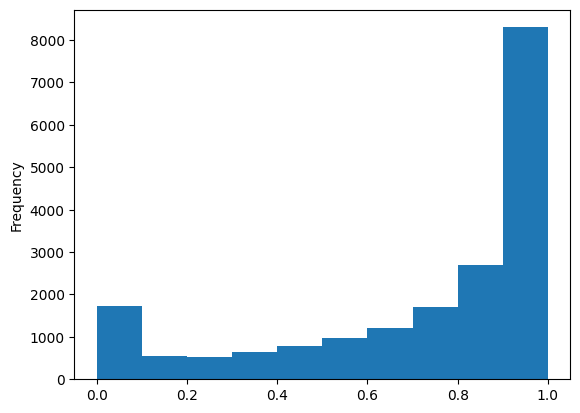

In [ ]:
results_df['p_value'].plot(kind='hist')

In [48]:
np.savez_compressed('data.npz', gtexdata=A1)
with open('data.json', 'w') as f:
    json.dump([tissue_index, donor_index, gene_index], f)